In [1]:
import pandas as pd

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


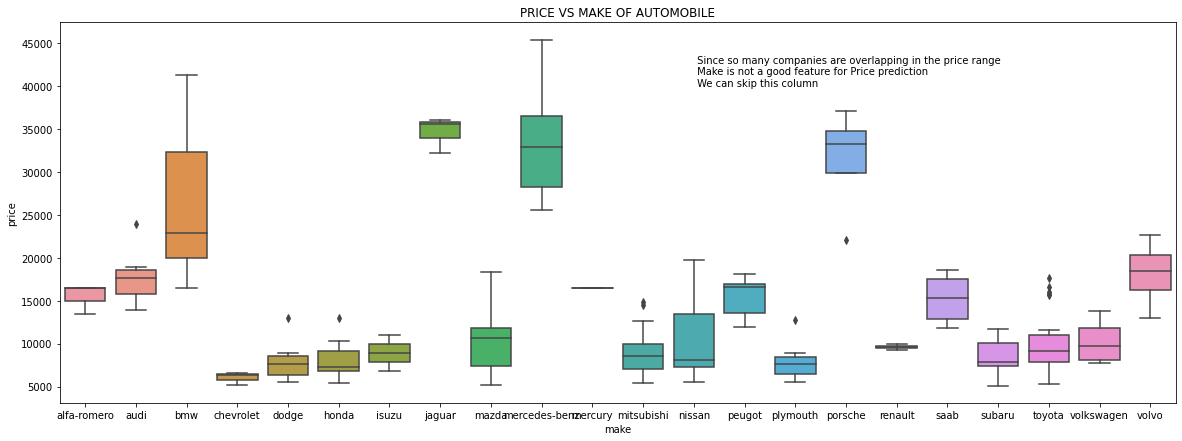

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x='make',y='price',data=df,ax=ax)
plt.title("PRICE VS MAKE OF AUTOMOBILE")
plt.text(12,40000," Since so many companies are overlapping in the price range\n Make is not a good feature for Price prediction\n We can skip this column")
plt.show()

In [4]:
import pandas_profiling as pp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!pip install pandas-profiling==2.7.1 

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 3.1MB 8.5MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 604kB 31.2MB/s 
     |████████████████████████████████| 296kB 32.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=21a24e2c3a60d1ad39e7620a24df09a677ed45b87330da4f60ca1407a0f69e8f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=1650e0daaa5855e4042670b5b420d7c2e17c8d6bfc51a48cbe9262fa6d3bcb58
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [5]:
pp.ProfileReport(df).to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

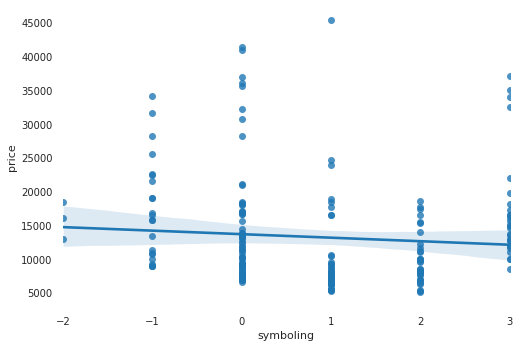

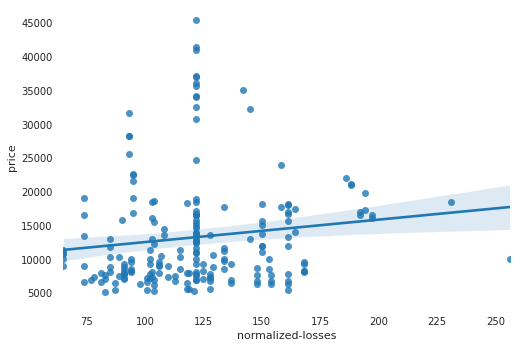

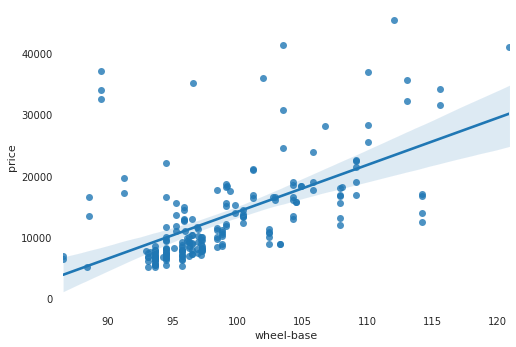

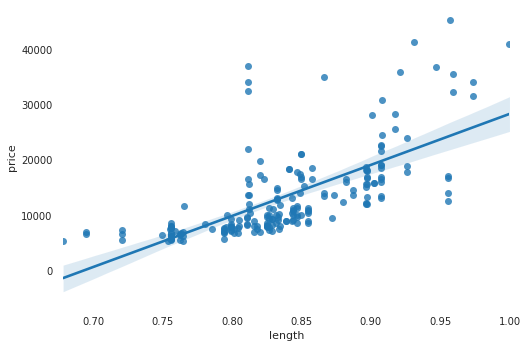

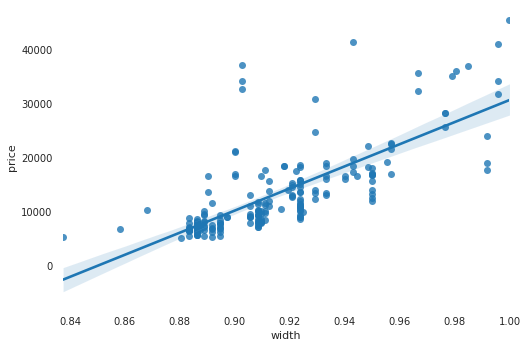

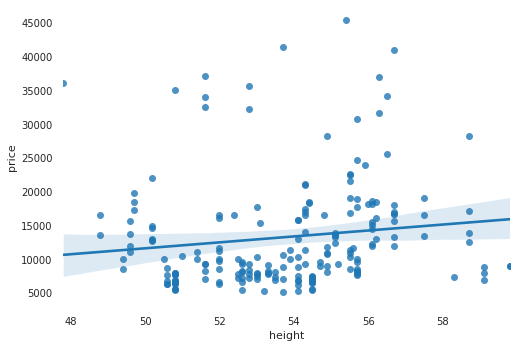

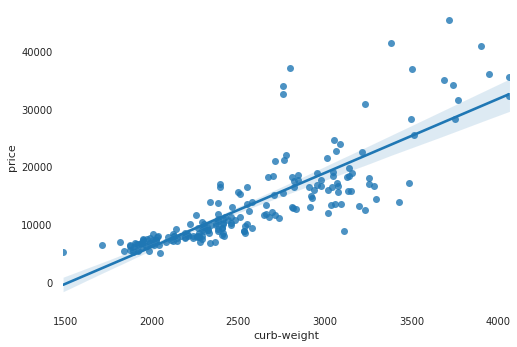

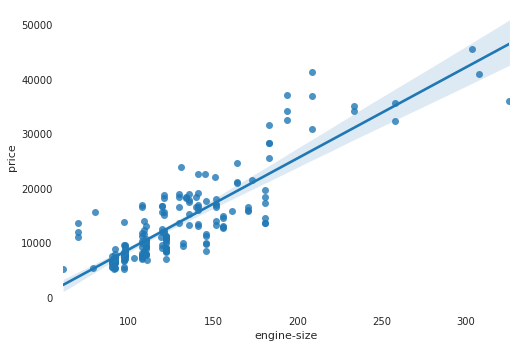

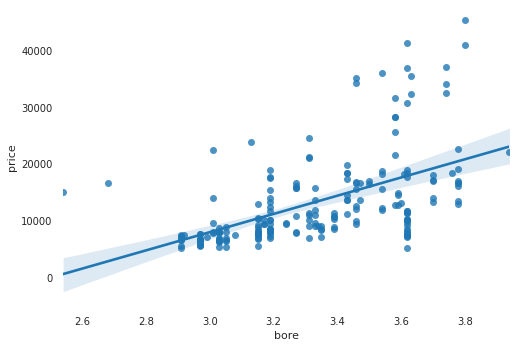

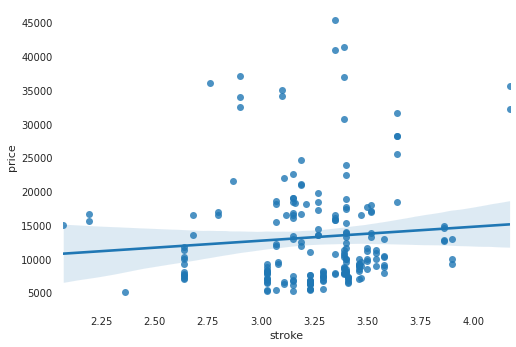

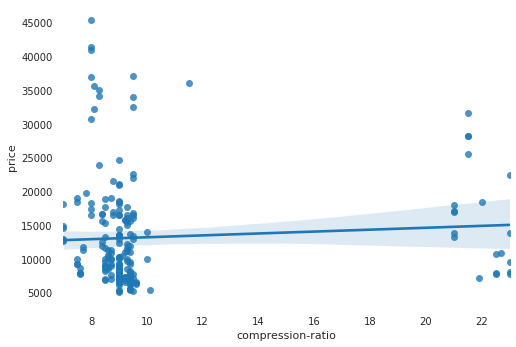

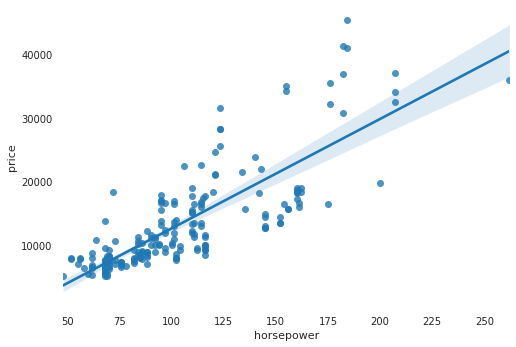

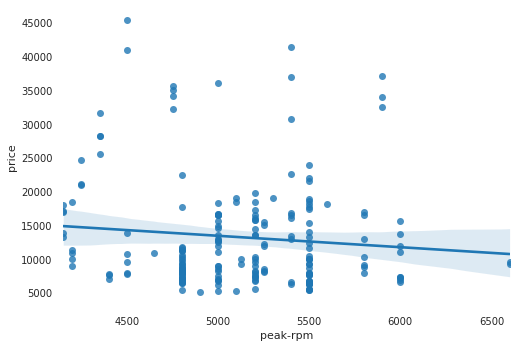

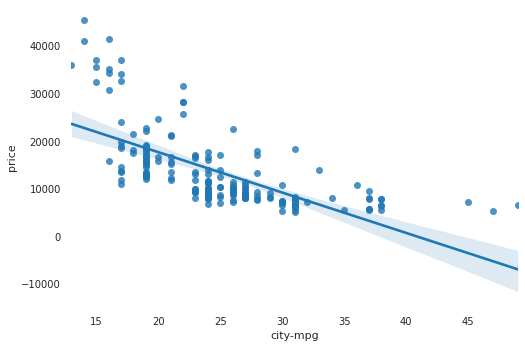

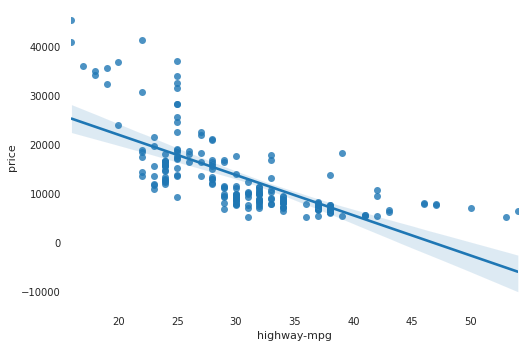

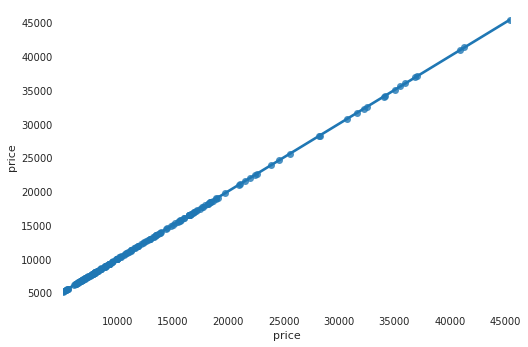

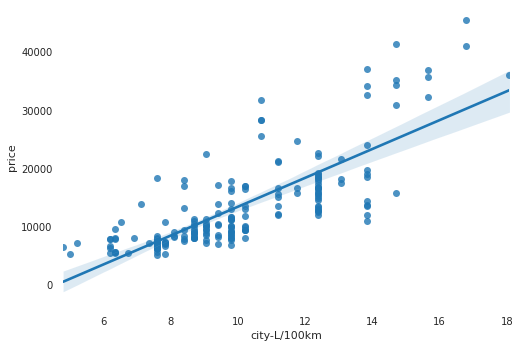

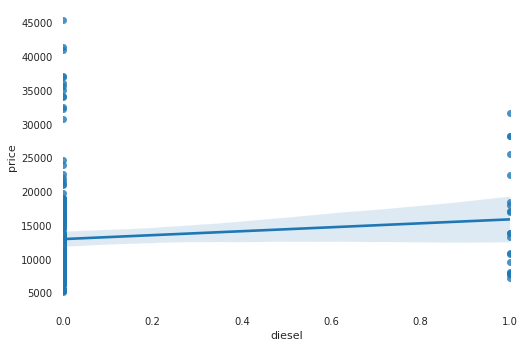

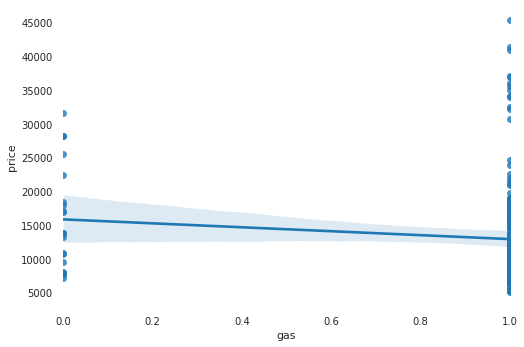

In [ ]:
for col in df:
    if df[col].dtype =='int64' or df[col].dtype =='float64' :
        sns.regplot(x=col,y='price',data=df)
        plt.show()

In [ ]:
for col in df:
    if df[col].dtype =='object':
        fig,ax = plt.subplots(figsize=(15,7))
        sns.boxplot(x=col,y='price',data=df,ax=ax)
        plt.show()

In [ ]:
# list of feature that are important
cols = ['num-of-cylinders','engine-location','drive-wheels','wheel-base','length','width','engine-size','curb-weight','bore','horsepower','city-mpg','highway-mpg']
features  = df[cols].copy() # we will get a seperate block of memory for this data
features.head()

,num-of-cylinders,engine-location,drive-wheels,wheel-base,length,width,engine-size,curb-weight,bore,horsepower,city-mpg,highway-mpg
0,four,front,rwd,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
1,four,front,rwd,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
2,six,front,rwd,94.5,0.822681,0.909722,152,2823,2.68,154.0,19,26
3,four,front,fwd,99.8,0.848630,0.919444,109,2337,3.19,102.0,24,30
4,five,front,4wd,99.4,0.848630,0.922222,136,2824,3.19,115.0,18,22


In [ ]:
y = df['price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
cylinder_hot_encoder = OneHotEncoder()
cylinder_dummies = cylinder_hot_encoder.fit_transform(df[['num-of-cylinders']]).toarray()
cylinder_dummies_df = pd.DataFrame(cylinder_dummies,columns=sorted(df['num-of-cylinders'].unique()))
cylinder_dummies_df.head()

,eight,five,four,six,three,twelve,two
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
eng_loc_encoder = LabelEncoder()
features['engine-location']= eng_loc_encoder.fit_transform(features['engine-location'])
features.head()

,num-of-cylinders,engine-location,drive-wheels,wheel-base,length,width,engine-size,curb-weight,bore,horsepower,city-mpg,highway-mpg
0,four,0,rwd,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
1,four,0,rwd,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
2,six,0,rwd,94.5,0.822681,0.909722,152,2823,2.68,154.0,19,26
3,four,0,fwd,99.8,0.848630,0.919444,109,2337,3.19,102.0,24,30
4,five,0,4wd,99.4,0.848630,0.922222,136,2824,3.19,115.0,18,22


In [ ]:
dwl_hot_encoder = OneHotEncoder()
dwl_dummies = dwl_hot_encoder.fit_transform(df[['drive-wheels']]).toarray()
dwl_dummies_df = pd.DataFrame(dwl_dummies,columns=sorted(df['drive-wheels'].unique()))
dwl_dummies_df.head()

,4wd,fwd,rwd
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [ ]:
features.drop(['num-of-cylinders','drive-wheels'],axis=1, inplace=True)
features.head()

,engine-location,wheel-base,length,width,engine-size,curb-weight,bore,horsepower,city-mpg,highway-mpg
0,0,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
1,0,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
2,0,94.5,0.822681,0.909722,152,2823,2.68,154.0,19,26
3,0,99.8,0.848630,0.919444,109,2337,3.19,102.0,24,30
4,0,99.4,0.848630,0.922222,136,2824,3.19,115.0,18,22


In [ ]:
X = pd.concat([dwl_dummies_df.iloc[:,:-1] , cylinder_dummies_df.iloc[:,:-1], features ], axis=1,)
X.head()

,4wd,fwd,eight,five,four,six,three,twelve,engine-location,wheel-base,length,width,engine-size,curb-weight,bore,horsepower,city-mpg,highway-mpg
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,88.6,0.811148,0.890278,130,2548,3.47,111.0,21,27
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,94.5,0.822681,0.909722,152,2823,2.68,154.0,19,26
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,99.8,0.848630,0.919444,109,2337,3.19,102.0,24,30
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,99.4,0.848630,0.922222,136,2824,3.19,115.0,18,22


# todo task
1. scale
2. split
3. linear-regression
4. score
5. predict and store in ypred
6. distplot
7. RMSE